# 피어슨 상관분석

피어슨 상관계수는 두 변수 간의 선형 상관관계를 측정

연속적인 데이터에서 사용되며, 두 변수가 서로 선형적으로 관련되어 있는 경우 유용

두 변수가 정규 분포를 따르고, 등분산성을 충족할 경우에 사용 가능

값의 범위는 `-1`에서 `1`까지이며, `1`에 가까울수록 `양의 선형 상관관계`, `-1`에 가까울수록 `음의 선형 상관관계`를 의미하며, `0`에 가까울수록 `상관관계가 없음`을 의미함

## #01. 준비작업

### [1] 패키지 참조

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel
from scipy.stats import pearsonr

### [2] 그래프 초기화

In [4]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

## #02. 예제1 - 언어영역 점수와 수리영역 점수의 상관관계

주어진 데이터는 정규성과 등분산성을 충족한다고 가정한다.

### [1] 데이터 가져오기

In [3]:
origin = read_excel("https://data.hossam.kr/mldata/point.xlsx")
origin

,언어영역,수리영역
0,392,428
1,404,518
2,346,376
3,382,426
4,368,409
5,449,490
6,391,448


### [2] 탐색적 데이터 분석

#### (1) 산점도 그래프를 통한 상관정도 확인

| 함수 | 차이 |
|---|---|
| scatterplot | `hue` 파라미터 사용 가능, 추세선 불가 |
| regplot | `hue` 파라미터 사용 불가, 추세선 자동 표시됨 |
| lmplot | `hue` 파라미터 사용 가능, 추세선 가능, `plt.figure()` 초기화 안함. 사이즈 수동 설정 |

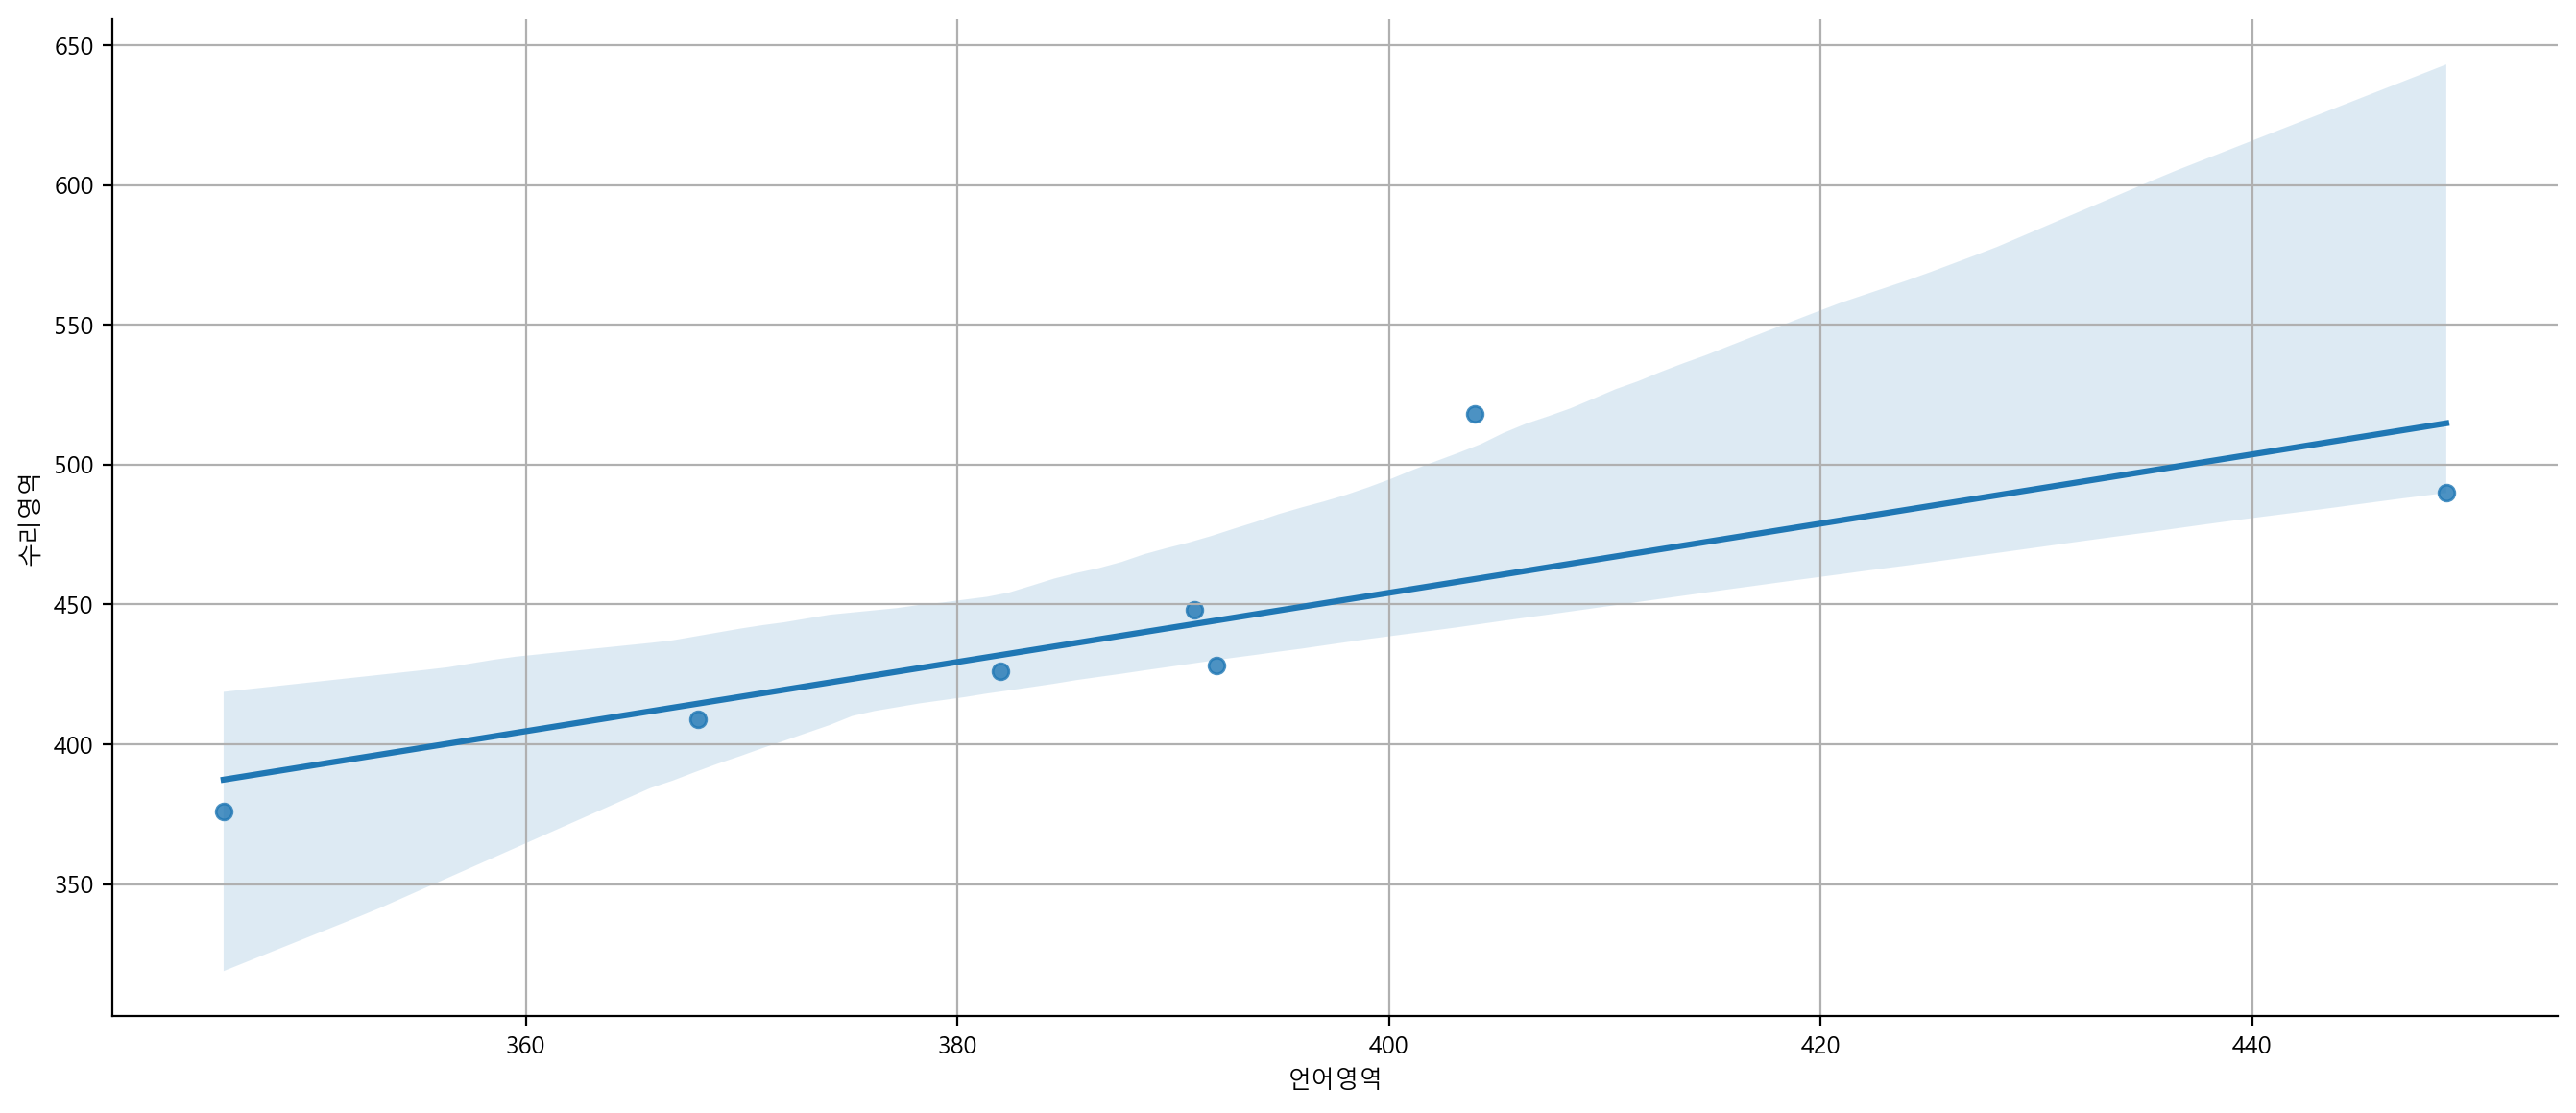

In [8]:
#plt.figure()
#sb.scatterplot(data=origin, x='언어영역', y='수리영역')
#sb.regplot(data=origin, x='언어영역', y='수리영역')

g = sb.lmplot(data=origin, x='언어영역', y='수리영역')
g.fig.set_figwidth(15) # 사이즈 수동설정 안해주면 전체적으로 보기 힘들수도.
g.fig.set_figheight(6)
g.fig.set_dpi(200) 

plt.grid()
plt.show()
plt.close()

### [3] 공분산

공분산은 상관관계의 상승 혹은 하강하는 경향을 이해할 수는 있으나 2개 변수의 측정 단위의 크기에 따라 값이 달라지므로 절대적 정도를 파악하기에는 한계가 있다.

결과값이 양수면 정비례, 음수면 반비례

> 그래서 잘 안쓴다.

2차원 배열이 리턴되는데 이 중에서 공분산 값은 `0행1열` 혹은 `1행0열`의 값이다.

In [9]:
c = np.cov(origin['언어영역'], origin['수리영역'])
c

array([[1027.57142857, 1271.95238095],
       [1271.95238095, 2335.47619048]])

In [10]:
"공분산: {0}".format(c[0][1])

'공분산: 1271.9523809523807'

### [4] 상관분석

상관계수를 알아내면 된다.

#### (1) numpy를 통한 상관계수 구하기

`p-value`는 알 수 없기 때문에 분석 결과를 검정할 수 없다.

기본적으로 상관행렬을 표시한다.

In [11]:
c = np.corrcoef(origin['언어영역'], origin['수리영역'])
c

array([[1.        , 0.82106421],
       [0.82106421, 1.        ]])

##### 상관계수를 얻기 위해서는 `0,1` 혹은 `1,0` 번째 항목을 취한다.

In [12]:
"상관계수: {0}".format(c[0][1])

'상관계수: 0.821064207442306'

#### (2) 피어슨 상관계수와 `p-value` 구하기

| 가설 | 내용 |
|---|---|
| 귀무가설 ($H_0$) | 두 변수는 상관관계가 없다. ($r = 0$) |
| 대립가설 ($H_1$) | 두 변수는 상관관계가 있다. ($r \neq 0$) |

In [13]:
s, p = pearsonr(origin['언어영역'], origin['수리영역'])
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무")

'statistic: 0.821, p-value: 0.024, 대립가설 채택'

> `p-value`가 유의수준 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 그러므로 언어영역 점수와 수리영역 점수는 상관이 있다.

### [5] 데이터프레임 객체를 통한 상관계수 구하기

이와 같이 표시되는 형태를 상관행렬이라고 한다.

`p-value`를 확인할 수는 없다.

`scipy` 패키지의 `pearsonr`함수로 상관계수와 `p-value`를 먼저 확인하고 대립가설 채택이 확정되면 시각화를 위해 이 기능을 사용한다.

In [14]:
corr = origin.corr(method='pearson')
corr

,언어영역,수리영역
언어영역,1.000000,0.821064
수리영역,0.821064,1.000000


#### 상관분석 결과 시각화

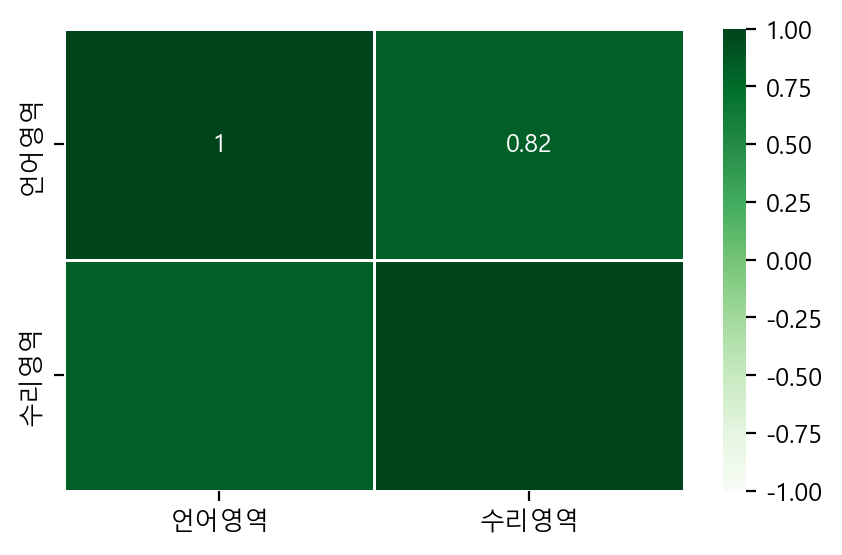

In [15]:
plt.figure(figsize=(5, 3))

sb.heatmap(corr,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1, #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
)

plt.show()
plt.close()

## 예제 (2) - mtcars 데이터를 통한 배기량에 따른 연비의 상관관계 분석

R 패키지인 ggplot2에 내장된 샘플 데이터로 자동차 32종의 11개 속성에 대한 정보를 담고 있는 데이터

| 필드 | 설명 |
|---|---|
| mpg | 연료 효율성 (마일 당 갤런) |
| cyl | 실린더 수 |
| disp | 배기량 (cubic inches) |
| hp | 마력 (horsepower) |
| drat | 후륜축 비율 (rear axle ratio) |
| wt | 차량 무게 (1000 파운드) |
| qsec | 1/4 마일 달성 시간 (초) |
| vs | V/S (V 엔진 형태인지, S는 직렬 엔진 형태인지를 나타냄) |
| am | 변속기 형태 (0: 자동, 1: 수동) |
| gear | 전진 기어 수 (전송 기어) |
| carb | 기화기 개수 (carburetors) |

### [1] 데이터 가져오기

In [5]:
df = read_excel("https://data.hossam.kr/mldata/mtcars.xlsx", index_col='name')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### [2] 배기량에 따른 연비에 대한 산점도 그래프

In [12]:
df1 = df.filter(['name','disp','mpg'])
df1.head()

,disp,mpg
name,,
Mazda RX4,160.0,21.0
Mazda RX4 Wag,160.0,21.0
Datsun 710,108.0,22.8
Hornet 4 Drive,258.0,21.4
Hornet Sportabout,360.0,18.7


In [13]:
df1.sort_values('disp', ascending = True, inplace =True)

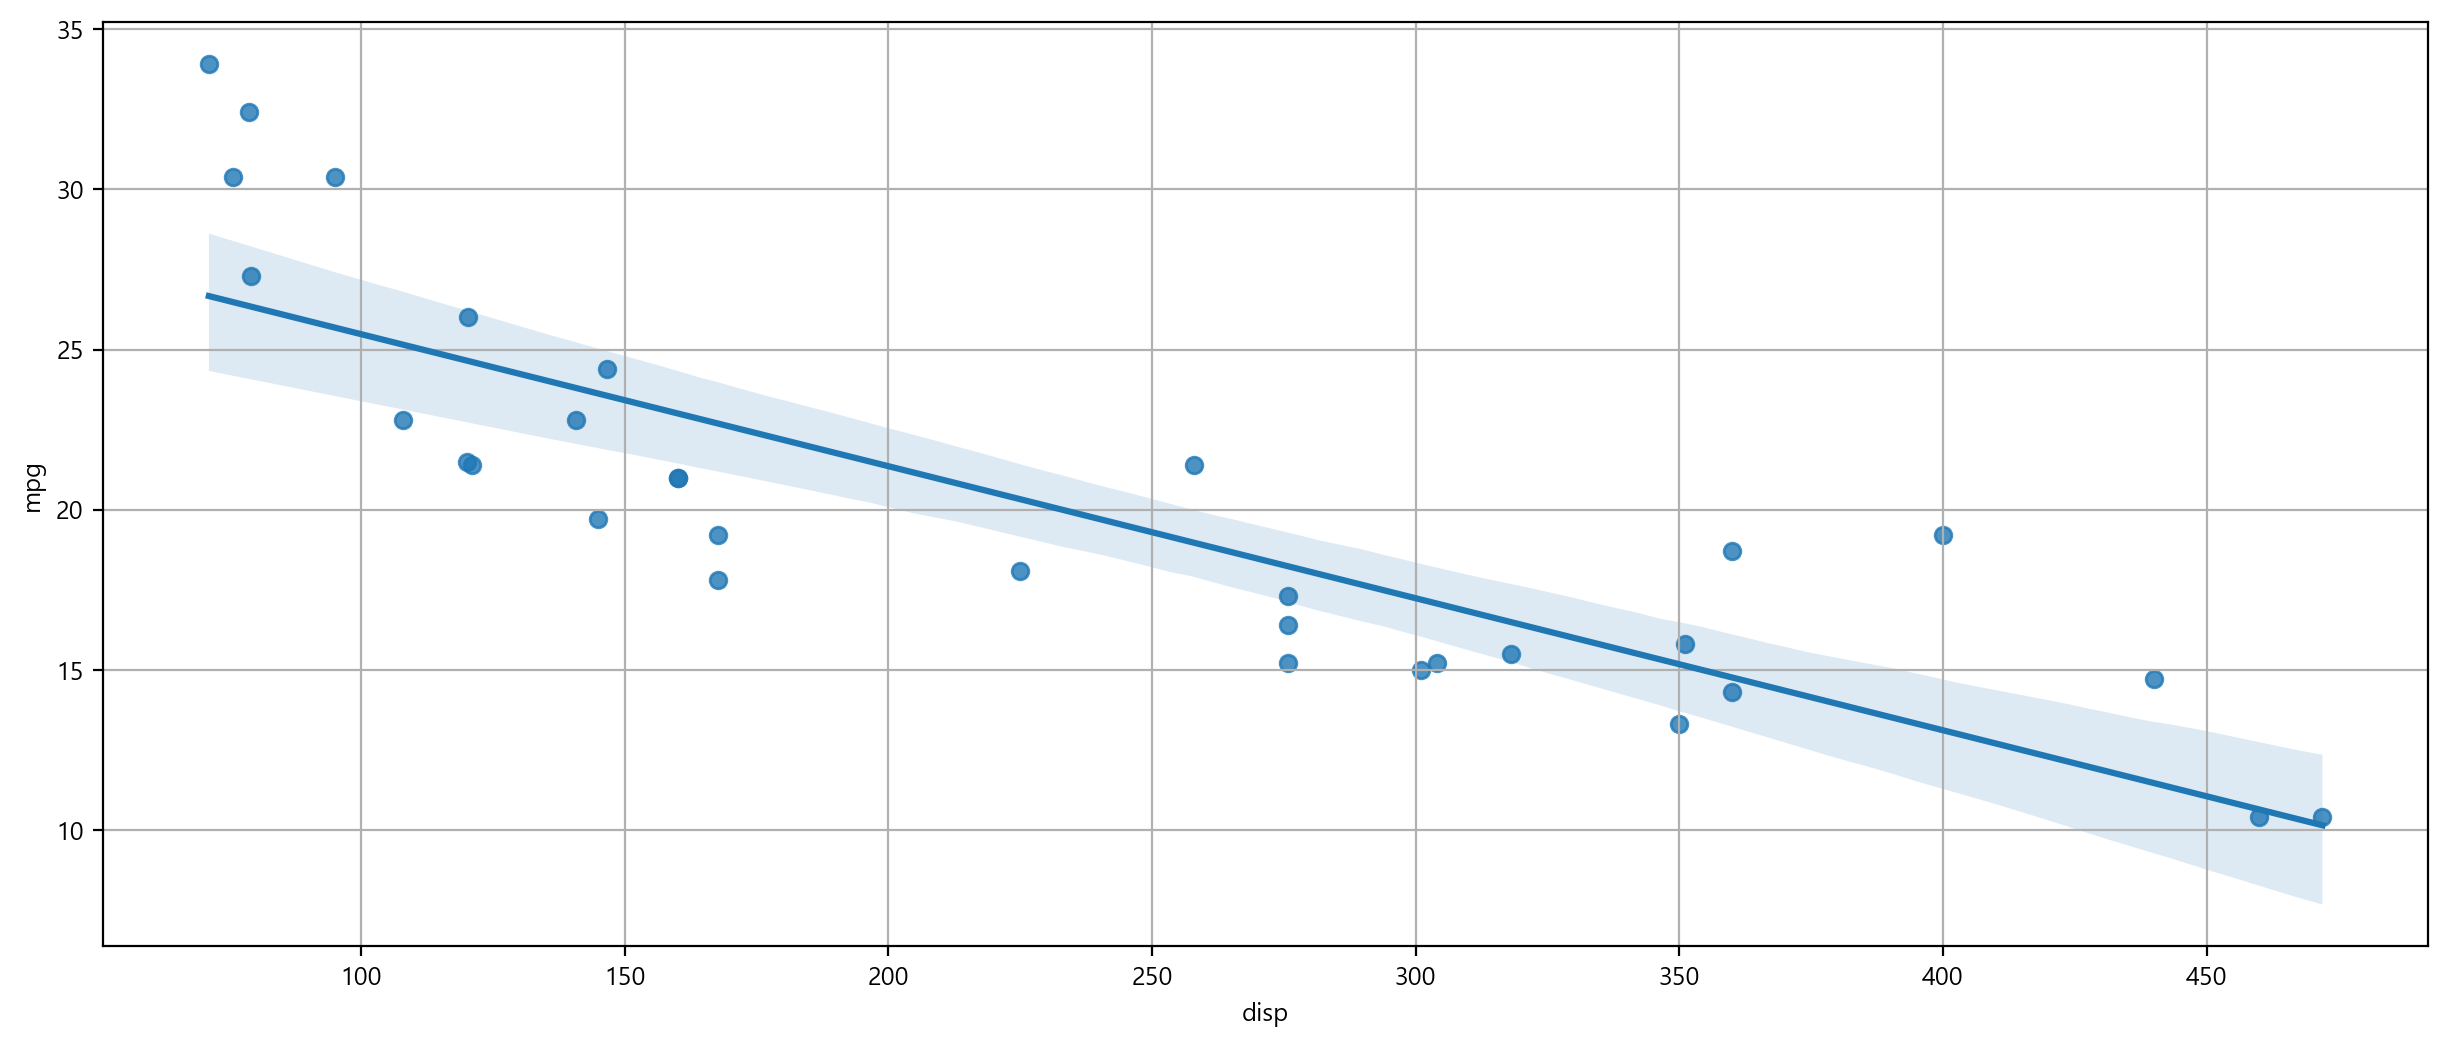

In [14]:

g = sb.regplot(data=df1, x='disp', y='mpg')
# g.fig.set_figwidth(15)
# g.fig.set_figheight(6)
# g.fig.set_dpi(200)
# plt.xticks([4,6,8])

plt.grid()
plt.show()
plt.close()

In [16]:
c  = np.cov(df1['disp'],df1['mpg'])
c

array([[15360.79982863,  -633.09720766],
       [ -633.09720766,    36.32410282]])

### [3] 상관분석

상관계수를 알아내면 된다.

#### (1) numpy를 통한 상관계수 구하기

`p-value`는 알 수 없기 때문에 분석 결과를 검정할 수 없다.

기본적으로 상관행렬을 표시한다.

In [17]:
c  = np.corrcoef(df1['disp'],df1['mpg'])
c

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

#### (2) 피어슨 상관계수와 `p-value` 구하기

| 가설 | 내용 |
|---|---|
| 귀무가설 ($H_0$) | 두 변수는 상관관계가 없다. ($r = 0$) |
| 대립가설 ($H_1$) | 두 변수는 상관관계가 있다. ($r \neq 0$) |

In [18]:
s, p = pearsonr(df1['disp'], df1['mpg'])
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무")

'statistic: -0.848, p-value: 0.000, 대립가설 채택'

> 배기량과 연비에 대한 상관분석 결과 배기량이 클 수록 연비가 낮아지는 상관 관계를 보인다.($P \leq 0.05$)

### [4] 분석 결과 시각화

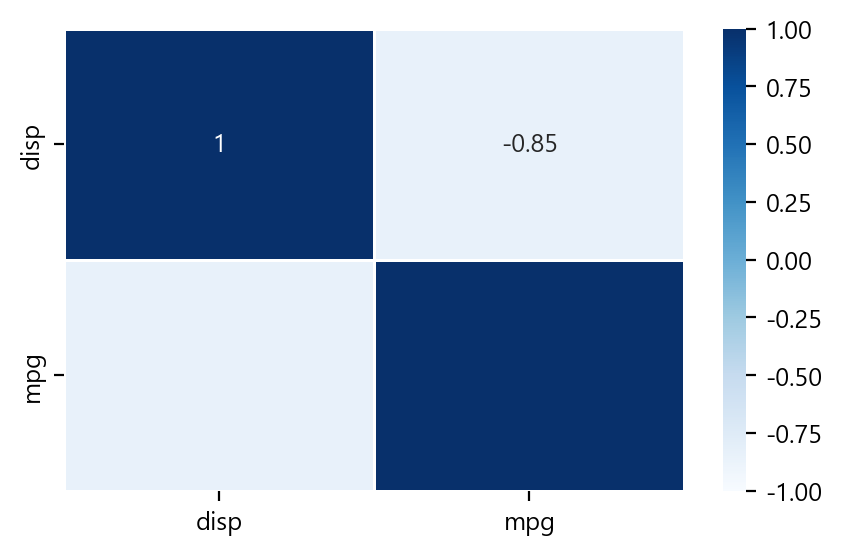

In [22]:
plt.figure(figsize=(5, 3), dpi=200)

corr = df1[['disp', 'mpg']].corr(method='pearson')

sb.heatmap(corr,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Blues', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
)

plt.show()
plt.close()

> 32종의 자동차를 대상으로 배기량에 따른 연비를 조사한 결과 배기량와 연비는 강한 음의 상관관계를 갖는 것으로 타나났다. `p-value`가 유의수준 0.05보다 작으므로 이는 통계적으로 유의하다.